In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
print(df.columns)
df.drop(columns=['id'])

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')


,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,:-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [7]:
X_train.drop(columns=['id'])

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
129122,0.781405,-4.356901,0.023500,0.000005,0.000001,0.040420,0.682512,241538.2567,0.541800
493077,0.532378,-8.908300,0.023500,0.012917,0.032240,0.076140,0.483868,180583.7425,0.994667
457814,0.912855,-14.355710,0.120433,0.372479,0.127346,0.024300,0.440126,291223.4702,0.566267
411024,0.471765,-5.637425,0.043413,0.504548,0.162065,0.065687,0.485008,313870.0566,0.492067
397112,0.975000,-11.681864,0.031886,0.086502,0.000001,0.308907,0.682415,243435.6405,0.453667
...,...,...,...,...,...,...,...,...,...
259178,0.683068,-3.998962,0.023500,0.309681,0.389897,0.243051,0.734752,223320.0386,0.295467
365838,0.723214,-1.357000,0.139675,0.726960,0.258900,0.296822,0.929107,316878.0301,0.087733
131932,0.553987,-11.086472,0.051913,0.000005,0.051336,0.262526,0.534394,235567.5310,0.761400
146867,0.975000,-16.016737,0.070721,0.226696,0.000001,0.172801,0.959661,264160.7161,0.073467


((array([-4.69663918, -4.51207189, -4.41214106, ...,  4.41214106,
          4.51207189,  4.69663918]),
  array([-27.50972513, -27.50972513, -27.42871333, ...,  -1.357     ,
          -1.357     ,  -1.357     ])),
 (4.553134230358868, -8.379014375027166, 0.9863252177760369))

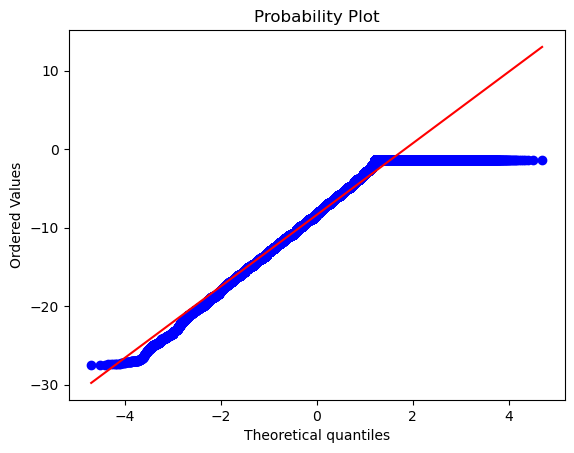

In [8]:
# Now we make a Q - Q plot on the AudioLoudness Column to check if it follow the Gaussian Distribution or not

# Then we will do the same for TrackDurationMs

from scipy import stats
stats.probplot(df['AudioLoudness'], dist  = "norm", plot = plt)



In [9]:
data = df['AudioLoudness']

data = data.to_numpy()

In [10]:
# We apply Yeo Johnson transform to make the Loudness column become normally distributed and not left skewed


from sklearn.preprocessing import PowerTransformer

method = PowerTransformer(method = "yeo-johnson")

In [11]:


feature = df[['AudioLoudness']]

X_train_array = method.fit_transform(feature)
X_test_array = method.transform(feature)

In [12]:
X_train_array = pd.DataFrame(X_train_array)

In [13]:
df.head(3)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989


In [14]:
X_train['AudioLoudness'] = X_train_array

In [15]:
X_train

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
129122,129122,0.781405,0.828897,0.023500,0.000005,0.000001,0.040420,0.682512,241538.2567,0.541800
493077,493077,0.532378,-0.210203,0.023500,0.012917,0.032240,0.076140,0.483868,180583.7425,0.994667
457814,457814,0.912855,-1.233246,0.120433,0.372479,0.127346,0.024300,0.440126,291223.4702,0.566267
411024,411024,0.471765,0.510747,0.043413,0.504548,0.162065,0.065687,0.485008,313870.0566,0.492067
397112,397112,0.975000,-0.752177,0.031886,0.086502,0.000001,0.308907,0.682415,243435.6405,0.453667
...,...,...,...,...,...,...,...,...,...,...
259178,259178,0.683068,0.922847,0.023500,0.309681,0.389897,0.243051,0.734752,223320.0386,0.295467
365838,365838,0.723214,1.721830,0.139675,0.726960,0.258900,0.296822,0.929107,316878.0301,0.087733
131932,131932,0.553987,-0.639975,0.051913,0.000005,0.051336,0.262526,0.534394,235567.5310,0.761400
146867,146867,0.975000,-1.516048,0.070721,0.226696,0.000001,0.172801,0.959661,264160.7161,0.073467


((array([-4.65083335, -4.46452441, -4.36359597, ...,  4.36359597,
          4.46452441,  4.65083335]),
  array([-3.23337842, -3.23026601, -3.22988696, ...,  1.7218298 ,
          1.7218298 ,  1.7218298 ])),
 (0.9862591043361416, 5.0681824484419076e-05, 0.9862255511387253))

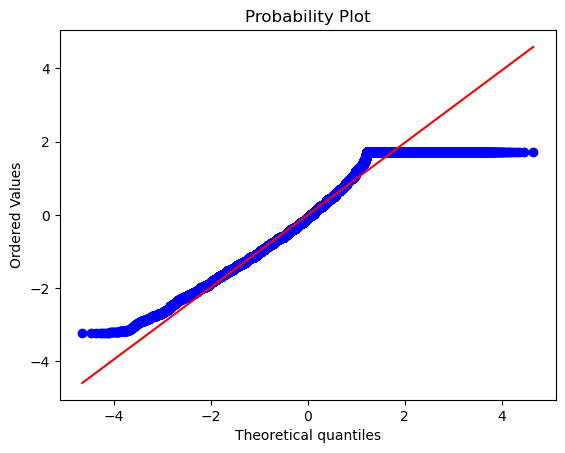

In [16]:
# Now we plot the QQ plot to check the distribution of Loudness Column again
stats.probplot(X_train['AudioLoudness'], dist  = "norm", plot = plt)

In [17]:
skewness = stats.skew(df['AudioLoudness'])

skewness

-0.3085126709470061

In [18]:
# SHould've done this earlier but now since our Skewness value is pretty low, we shouldn't have transformed it in the first place

In [19]:
X_train['AudioLoudness'] = df['AudioLoudness']

In [20]:
X_train

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
129122,129122,0.781405,-4.356901,0.023500,0.000005,0.000001,0.040420,0.682512,241538.2567,0.541800
493077,493077,0.532378,-8.908300,0.023500,0.012917,0.032240,0.076140,0.483868,180583.7425,0.994667
457814,457814,0.912855,-14.355710,0.120433,0.372479,0.127346,0.024300,0.440126,291223.4702,0.566267
411024,411024,0.471765,-5.637425,0.043413,0.504548,0.162065,0.065687,0.485008,313870.0566,0.492067
397112,397112,0.975000,-11.681864,0.031886,0.086502,0.000001,0.308907,0.682415,243435.6405,0.453667
...,...,...,...,...,...,...,...,...,...,...
259178,259178,0.683068,-3.998962,0.023500,0.309681,0.389897,0.243051,0.734752,223320.0386,0.295467
365838,365838,0.723214,-1.357000,0.139675,0.726960,0.258900,0.296822,0.929107,316878.0301,0.087733
131932,131932,0.553987,-11.086472,0.051913,0.000005,0.051336,0.262526,0.534394,235567.5310,0.761400
146867,146867,0.975000,-16.016737,0.070721,0.226696,0.000001,0.172801,0.959661,264160.7161,0.073467


In [21]:
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [22]:
skewness = stats.skew(X_train['TrackDurationMs'])
skewness

-0.19028848333290044

((array([-4.65083335, -4.46452441, -4.36359597, ...,  4.36359597,
          4.46452441,  4.65083335]),
  array([ 63973.    ,  63973.    ,  63973.    , ..., 445901.535 ,
         448634.3222, 464723.2281])),
 (59165.15246068653, 241859.84246664622, 0.9965492191826035))

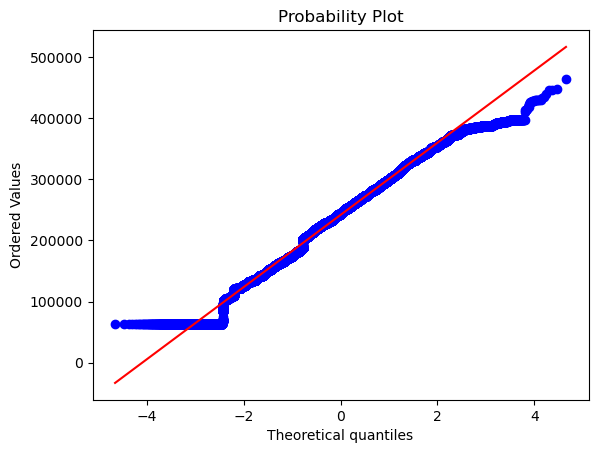

In [23]:
stats.probplot(X_train['TrackDurationMs'], dist  = "norm", plot = plt)

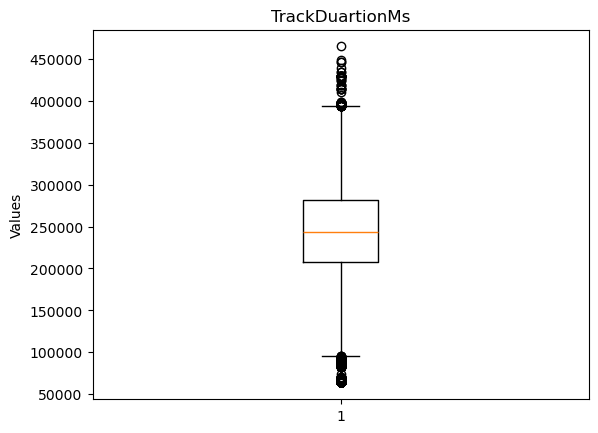

In [24]:
plt.boxplot(df['TrackDurationMs'])
plt.title("TrackDuartionMs")
plt.ylabel("Values")
plt.show()

In [25]:
import numpy as np
percntile25 = np.percentile(df['TrackDurationMs'], 25)
percentile50 = np.percentile(df['TrackDurationMs'], 50)
percentile75 = np.percentile(df['TrackDurationMs'], 75)
mini = np.min(df['TrackDurationMs'])
mini, percntile25, percentile50, percentile75

(63973.0, 207099.876625, 243684.05815, 281851.6585)

In [26]:
count = 0

data = df['TrackDurationMs']

for values in data:
    if values <= 207099.876625:
        count = count + 1


In [27]:
# TrackDuratin is skewed so we apply square transformation on it since it's left skewed.

X_train_transform = X_train
X_train_transform['TrackDurationMs'] = X_train['TrackDurationMs']**2


((array([-4.65083335, -4.46452441, -4.36359597, ...,  4.36359597,
          4.46452441,  4.65083335]),
  array([4.09254473e+09, 4.09254473e+09, 4.09254473e+09, ...,
         1.98828179e+11, 2.01272755e+11, 2.15967679e+11])),
 (28179589265.793324, 62020901092.4812, 0.9904544582465042))

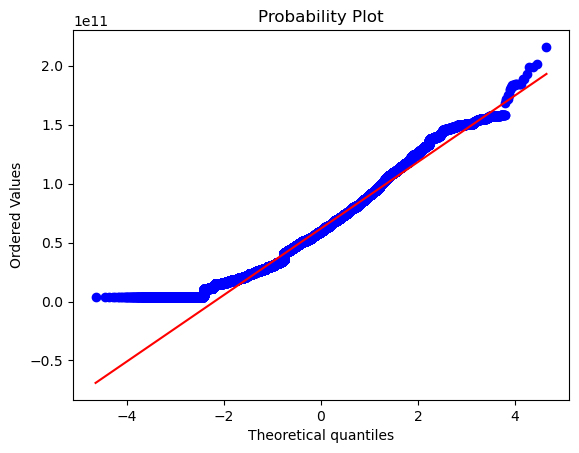

In [28]:
 stats.probplot(X_train_transform['TrackDurationMs'], dist  = "norm", plot = plt)

In [29]:
X_train_transform['TrackDurationMs']

129122    5.834073e+10
493077    3.261049e+10
457814    8.481111e+10
411024    9.851441e+10
397112    5.926091e+10
              ...     
259178    4.987184e+10
365838    1.004117e+11
131932    5.549206e+10
146867    6.978088e+10
121958    8.957928e+10
Name: TrackDurationMs, Length: 419331, dtype: float64

In [30]:
# We can check the skewness of this series
skewness = stats.skew(X_train_transform['TrackDurationMs'])
skewness

0.46889568697210204

In [31]:
# Since the Series is more right skewed, we apply log transform on it
arr = np.log(X_train_transform['TrackDurationMs'])
arr = pd.DataFrame(arr)

In [32]:
arr

,TrackDurationMs
129122,24.789566
493077,24.207900
457814,25.163692
411024,25.313469
397112,24.805216
...,...
259178,24.632722
365838,25.332544
131932,24.739506
146867,24.968626


In [33]:
X_train_transform['TrackDurationMs'] = arr 


In [34]:
skewness = stats.skew(X_train_transform['TrackDurationMs'])
skewness

-1.1860007739988159

((array([-4.65083335, -4.46452441, -4.36359597, ...,  4.36359597,
          4.46452441,  4.65083335]),
  array([22.1324328 , 22.1324328 , 22.1324328 , ..., 26.01570687,
         26.02792682, 26.0983946 ])),
 (0.535453820181585, 24.722539311720542, 0.9649045435812234))

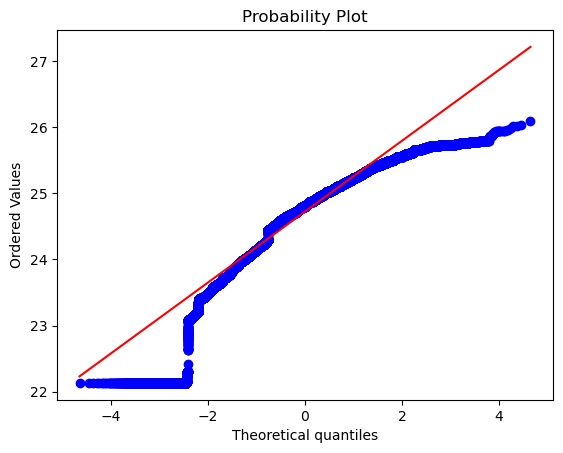

In [36]:
# Lets plot the QQ plot and then see what's the curve now like
stats.probplot(X_train_transform['TrackDurationMs'], dist  = "norm", plot = plt)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

arr1 = scaler.fit_transform(X_train_transform[['TrackDurationMs']])

arr1 = pd.DataFrame(arr1)

arr2 = scaler.transform(X_test[['TrackDurationMs']])

arr2 = pd.DataFrame(arr2)


In [43]:
X_train_transform['TrackDurationMs'] = arr1
X_test['TrackDurationMs'] = arr2

In [46]:
X_train_transform.isnull().sum()

id                               0
RhythmScore                      0
AudioLoudness                    0
VocalContent                     0
AcousticQuality                  0
InstrumentalScore                0
LivePerformanceLikelihood        0
MoodScore                        0
TrackDurationMs              83817
Energy                           0
dtype: int64

In [47]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64